In [97]:
# Import necessary libraries
import pandas as pd

#Retrieve the dataset.
data = pd.read_csv('purchase_data.csv')

# Preview the data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve the dataset.
data = pd.read_csv('purchase_data.csv')

# Change InvoiceDate to datetime with dayfirst
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], dayfirst=True)

# Generate a TotalPrice column for revenue calculation
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Address missing data
# Remove rows with missing CustomerID as they are essential for customer analysis
data = data.dropna(subset=['CustomerID'])

# Exclude incorrect information.
# Remove entries with non-positive Quantity values.
data = data[data['Quantity'] > 0]

# Remove entries where UnitPrice is zero or negative.
data = data[data['UnitPrice'] > 0]

# Examine the processed dataset
print("Cleaned Dataset Overview:")
print(data.info())
print(data.describe())

# Save the refined data for further examination.
data.to_csv('cleaned_purchase_data.csv', index=False)

Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  397884.000000                         397884  397884.000000   
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   
min         1.000000  

In [73]:
import pandas as pd
import numpy as np

# Retrieve only the columns with numeric data.
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Remove Missing Data
# Replace missing values in a dataset with an appropriate statistic, such as the column mean or median, to handle missing data effectively
numerical_data = numerical_data.fillna(numerical_data.mean())

# Remove outliers using the IQR method
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with outliers
cleaned_numerical_data = numerical_data[
    ~((numerical_data < lower_bound) | (numerical_data > upper_bound)).any(axis=1)
]

# Step 3: Normalize or scale numerical data (optional)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_numerical_data = pd.DataFrame(
    scaler.fit_transform(cleaned_numerical_data),
    columns=cleaned_numerical_data.columns
)

# Replace the original numerical columns with cleaned data in the dataset
data[scaled_numerical_data.columns] = scaled_numerical_data

# Save the cleaned dataset
data.to_csv('cleaned_data.csv', index=False)

# Inspect the cleaned numerical data
print("Cleaned Numerical Data Overview:")
print(data.describe())

Cleaned Numerical Data Overview:
            Quantity                    InvoiceDate      UnitPrice  \
count  269563.000000                         397884  269563.000000   
mean        0.281070  2011-07-10 23:41:23.511023360       0.281070   
min         0.000000            2010-12-01 08:26:00       0.000000   
25%         0.000000            2011-04-07 11:12:00       0.000000   
50%         0.000000            2011-07-31 14:39:00       0.000000   
75%         1.000000            2011-10-20 14:33:00       1.000000   
max         1.000000            2011-12-09 12:50:00       1.000000   
std         0.449522                            NaN       0.449522   

          CustomerID     TotalPrice  
count  269563.000000  269563.000000  
mean        0.718930       0.281070  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         1.000000       0.000000  
75%         1.000000       1.000000  
max         1.000000       1.000000  
std         0.449522       0.449

In [107]:
#Work with missing data points.
missing_values = data.isnull()
print(missing_values)

        InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0           False      False        False     False        False      False   
1           False      False        False     False        False      False   
2           False      False        False     False        False      False   
3           False      False        False     False        False      False   
4           False      False        False     False        False      False   
...           ...        ...          ...       ...          ...        ...   
541904      False      False        False      True        False       True   
541905      False      False        False      True        False       True   
541906      False      False        False      True        False       True   
541907      False      False        False      True        False       True   
541908      False      False        False      True        False       True   

        CustomerID  Country  TotalPrice  
0        

In [109]:
# Replace NAN values in the Description column with 'NA'
data['Description'] = data['Description'].fillna('NA')

In [111]:
#Calculate the Total Missing Values per Column
missing_count = data.isnull().sum()
print(missing_count)

InvoiceNo           0
StockCode           0
Description         0
Quantity       165100
InvoiceDate         0
UnitPrice      165100
CustomerID     165100
Country             0
TotalPrice     165100
dtype: int64


In [113]:
#Identify Missing Values Across the Dataset
total_missing = data.isnull().sum().sum()
print(f'Total missing values: {total_missing}')

Total missing values: 660400


In [115]:
# Check for Columns with Missing Values
columns_with_missing = data.columns[data.isnull().any()]
print(f'Columns with missing values: {columns_with_missing.tolist()}')

Columns with missing values: ['Quantity', 'UnitPrice', 'CustomerID', 'TotalPrice']


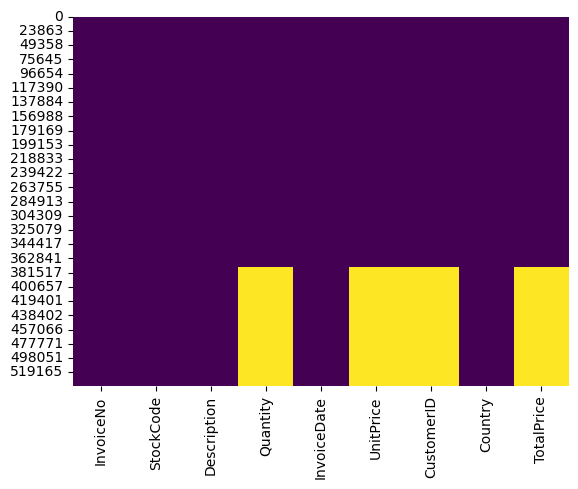

In [87]:
#Identify Gaps in Data
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

1. The monthly fluctuations in total revenue and the number of transactions

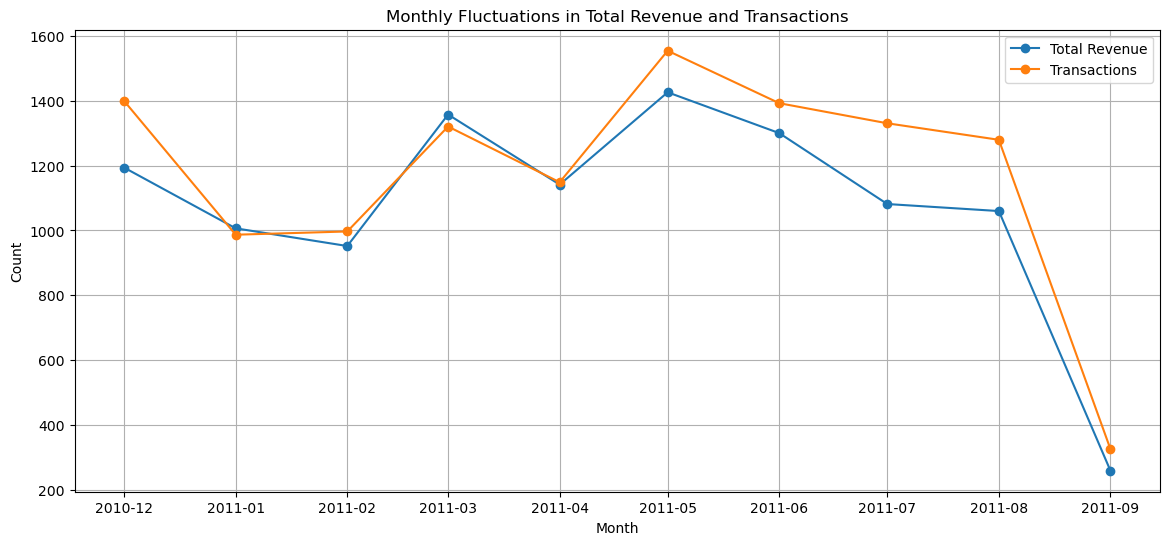

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that the InvoiceDate field is formatted as a DateTime data type.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Remove rows containing invalid dates, if present.
data = data.dropna(subset=['InvoiceDate'])

# Ensure Quantity and UnitPrice are numeric
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')

# Drop rows with missing or invalid Quantity or UnitPrice
data = data.dropna(subset=['Quantity', 'UnitPrice'])

# Genarate the TotalPrice column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Retrieve the Year-Month timeframe
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Group data by month to calculate the overall revenue and transaction totals.
monthly_stats = data.groupby('YearMonth').agg(
    TotalRevenue=('TotalPrice', 'sum'),
    Transactions=('InvoiceNo', 'nunique')
).reset_index()

# change YearMonth to timestamp for plotting
monthly_stats['YearMonth'] = monthly_stats['YearMonth'].dt.to_timestamp()

# Visualizing the tendencies
plt.figure(figsize=(14, 6))
plt.plot(monthly_stats['YearMonth'], monthly_stats['TotalRevenue'], label='Total Revenue', marker='o')
plt.plot(monthly_stats['YearMonth'], monthly_stats['Transactions'], label='Transactions', marker='o')
plt.title('Monthly Fluctuations in Total Revenue and Transactions')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

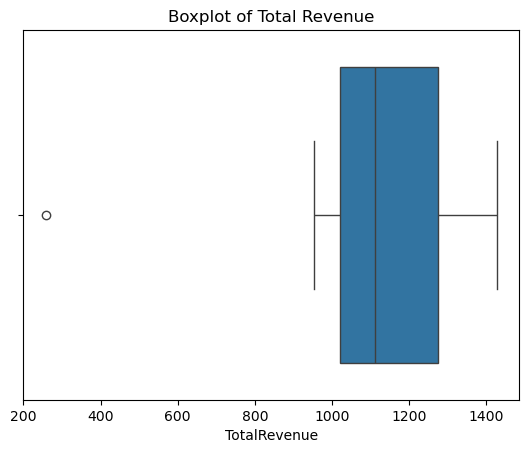

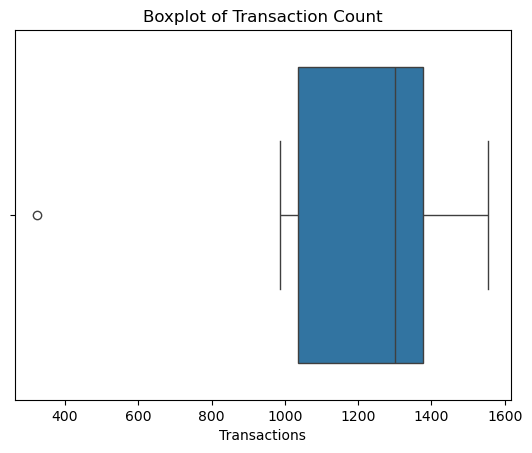

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# A box plot illustrating revenue.
sns.boxplot(x=monthly_stats['TotalRevenue'])
plt.title("Boxplot of Total Revenue")
plt.show()

# A box plot illustrating transactions.
sns.boxplot(x=monthly_stats['Transactions'])
plt.title("Boxplot of Transaction Count")
plt.show()


2.The highest total revenue and demonstrate consistent revenue growth trends

In [121]:
# Aggregate total revenue by product category
category_revenue = data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)
print("Top Products by Total Revenue:")
print(category_revenue.head(10))

Top Products by Total Revenue:
Description
WHITE HANGING HEART T-LIGHT HOLDER    66.499451
REGENCY CAKESTAND 3 TIER              56.502211
PARTY BUNTING                         52.729969
JUMBO BAG RED RETROSPOT               48.624129
LUNCH BAG RED RETROSPOT               43.215665
ASSORTED COLOUR BIRD ORNAMENT         41.682424
PACK OF 72 RETROSPOT CAKE CASES       34.579057
LUNCH BAG CARS BLUE                   34.359812
SET OF 3 CAKE TINS PANTRY DESIGN      34.146743
LUNCH BAG PINK POLKADOT               33.178742
Name: TotalPrice, dtype: float64


In [135]:
# Check InvoiceDate is in datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Withdraw Year-Month period
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Summarize total revenue grouped by product description and month.
category_trends = data.groupby(['Description', 'YearMonth'])['TotalPrice'].sum().reset_index()

# Stripping whitespace from column names
category_trends.columns = category_trends.columns.str.strip()

print(category_trends.head())


                      Description YearMonth  TotalPrice
0   4 PURPLE FLOCK DINNER CANDLES   2010-12    0.213993
1   4 PURPLE FLOCK DINNER CANDLES   2011-01    0.084006
2   4 PURPLE FLOCK DINNER CANDLES   2011-02    0.040508
3   4 PURPLE FLOCK DINNER CANDLES   2011-04    0.081129
4   4 PURPLE FLOCK DINNER CANDLES   2011-05    0.021772


Product SET OF 3 CAKE TINS PANTRY DESIGN not found in data


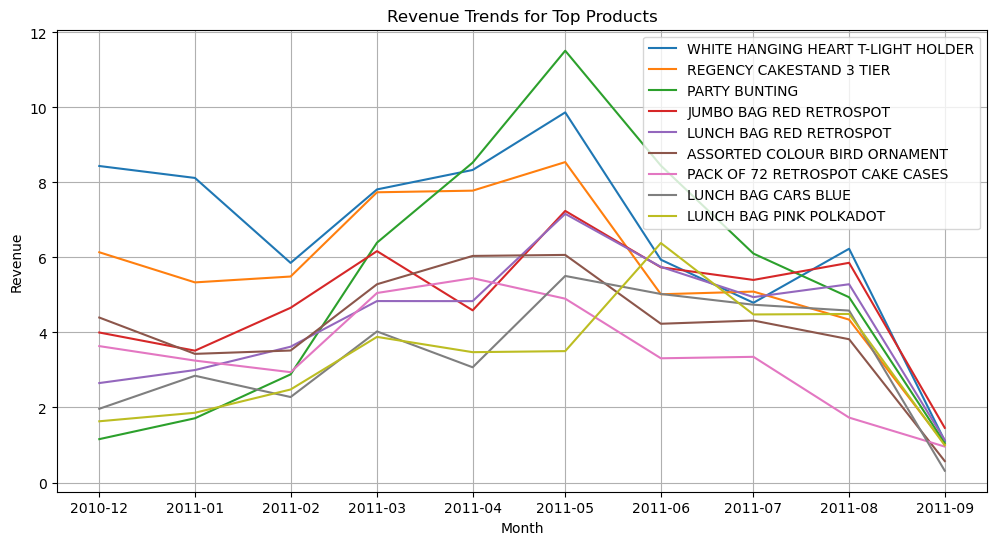

In [139]:
plt.figure(figsize=(12, 6))
for product in top_products:
    product_cleaned = product.strip().upper()  # Clean and standardize
    product_data = category_trends[category_trends['Description'].str.upper() == product_cleaned]
    if not product_data.empty:
        # Convert YearMonth to timestamps for plotting
        plt.plot(product_data['YearMonth'].dt.to_timestamp(), product_data['TotalPrice'], label=product_cleaned)
    else:
        print(f"Product {product_cleaned} not found in data")
        
plt.title('Revenue Trends for Top Products')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

3.  The seasonal variations in sales for different product categories

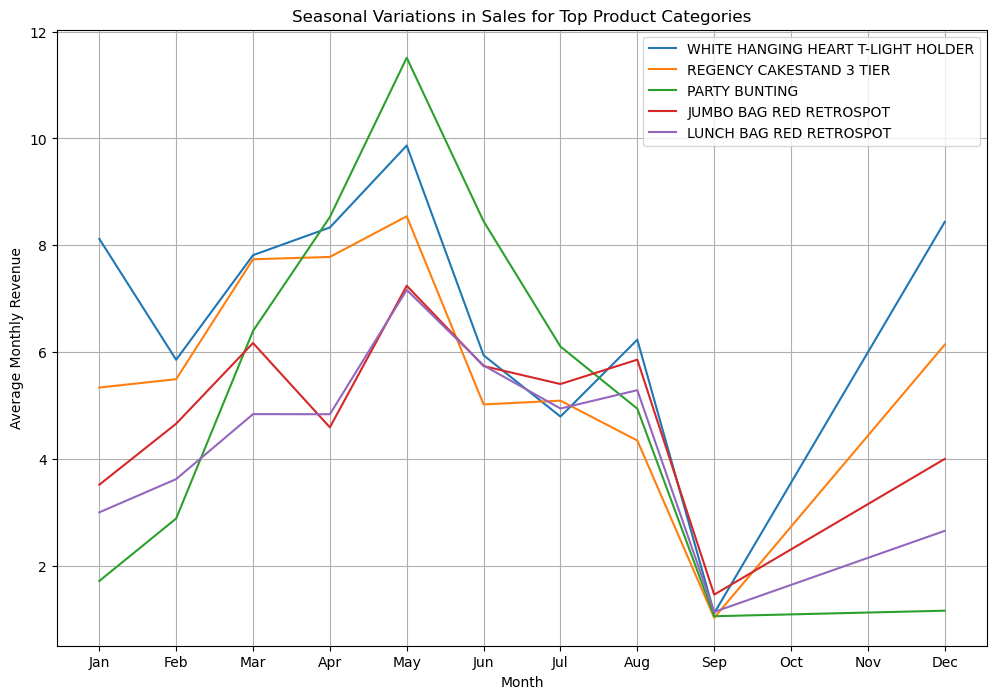

Categories Sensitive to Specific Time Periods (Peaks):
REGENCY CAKESTAND 3 TIER: Month
5    1.511888
Name: REGENCY CAKESTAND 3 TIER, dtype: float64
PARTY BUNTING: Month
4    1.617358
5    2.183147
6    1.602183
Name: PARTY BUNTING, dtype: float64
LUNCH BAG RED RETROSPOT: Month
5    1.657418
Name: LUNCH BAG RED RETROSPOT, dtype: float64


In [141]:
#  Calculating monthly earnings for every product category.
monthly_category_revenue = data.groupby(['YearMonth', 'Description'])['TotalPrice'].sum().reset_index()

# Reorganizing data to simplify the analysis of seasonal patterns.
category_trends = monthly_category_revenue.pivot(index='YearMonth', columns='Description', values='TotalPrice').fillna(0)

# Isolating the month component from YearMonth for seasonal analysis.
category_trends['Month'] = category_trends.index.month  # Directly extract month from PeriodIndex

# Computing the average sales for each month over multiple years.
monthly_avg_sales = category_trends.groupby('Month').mean()

# Restricting the plot to the top 5 categories ranked by average monthly revenue.
top_categories = monthly_avg_sales.sum().nlargest(5).index

# Analyzing seasonal trends for the top 5 categories.
plt.figure(figsize=(12, 8))
for category in top_categories:
    plt.plot(monthly_avg_sales.index, monthly_avg_sales[category], label=category)

plt.title('Seasonal Variations in Sales for Top Product Categories')
plt.xlabel('Month')
plt.ylabel('Average Monthly Revenue')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Identifying categories that are influenced by specific time periods.
sensitive_categories = {}
threshold = 1.5  

for category in top_categories: 
    seasonal_variation = monthly_avg_sales[category] / monthly_avg_sales[category].mean()
    peaks = seasonal_variation[seasonal_variation > threshold]
    if not peaks.empty:
        sensitive_categories[category] = peaks

print("Categories Sensitive to Specific Time Periods (Peaks):")
for category, peaks in sensitive_categories.items():
    print(f"{category}: {peaks}")


In [143]:
print(data.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'YearMonth'],
      dtype='object')


In [145]:
# Parse 'InvoiceDate' as a datetime object.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate Recency, Frequency, and Monetary (RFM) metrics

# The current point in time for calculating recency
current_date = data['InvoiceDate'].max()

# Number of days since the customer's most recent purchase.
recency = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (current_date - recency['InvoiceDate']).dt.days

# The number of distinct invoices associated with each customer.
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# The aggregated TotalPrice of transactions for each customer, representing their total monetary contribution
monetary = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)

# Merge RFM metrics
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
rfm = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']]

# Examine changes in buying habits.
# Add additional analysis or clustering as needed

# Display the RFM metrics
print(rfm)

      CustomerID  Recency  Frequency   Monetary
0       0.000000       58          7  10.208484
1       0.000168      216          2   0.182886
2       0.000337       28          3   4.067188
3       0.000842       93          2   0.995240
4       0.001010      184          1   0.127648
...          ...      ...        ...        ...
3716    0.998822      233          1   0.549653
3717    0.998990      170          1   0.212403
3718    0.999158        9          2   0.457687
3719    0.999327       12         43   2.503026
3720    1.000000       61          2   0.222978

[3721 rows x 4 columns]


4. Analyzing customer purchasing behavior across transactions to uncover recurring patterns or significant changes in preferences, with the goal of deriving actionable insights to optimize the company's marketing strategy.

Cluster Summary:
   Cluster  AvgRecency  AvgFrequency    AvgMonetary  CustomerCount
0        0   42.702685      3.682711    1359.049284           3054
1        1  247.075914      1.552015     480.617480           1067
2        2    6.384615     82.538462  127338.313846             13
3        3   14.500000     22.333333   12709.090490            204


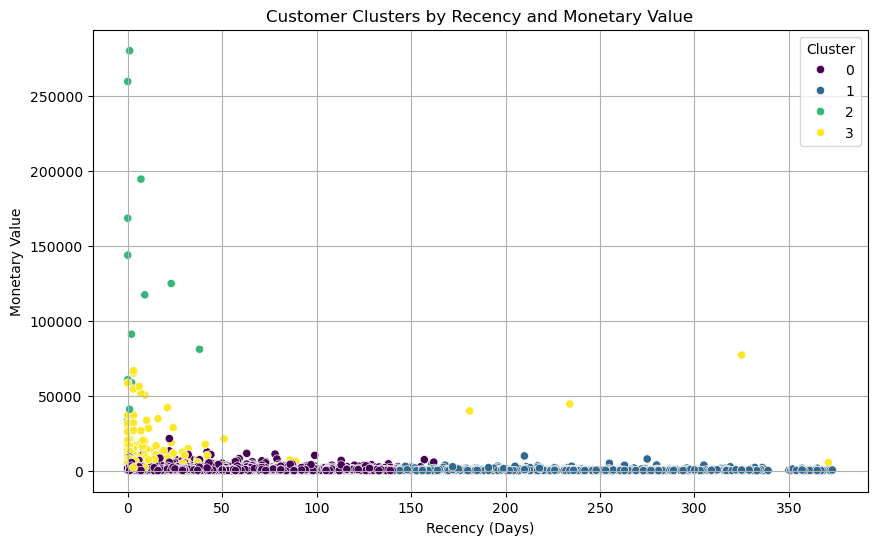

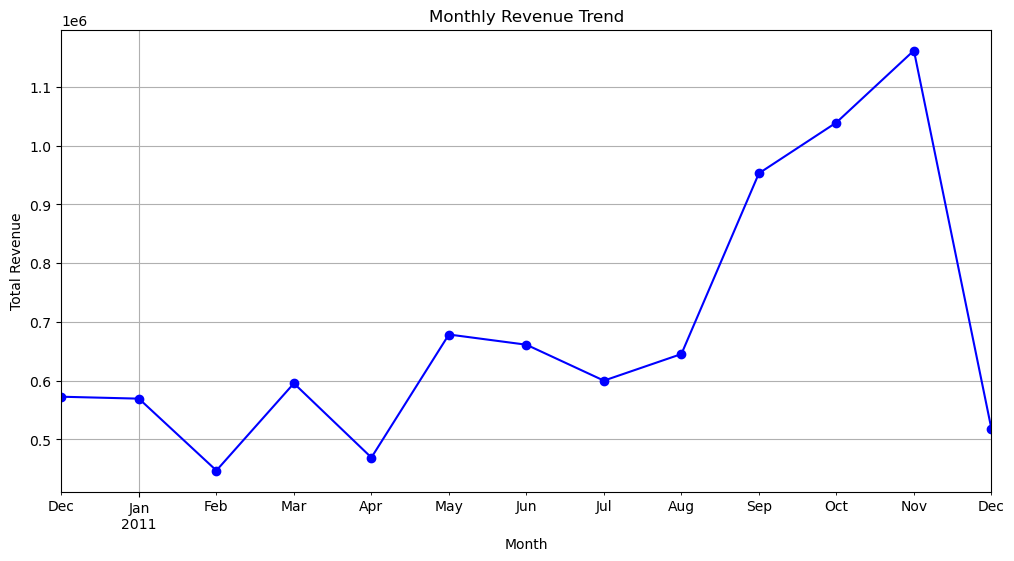

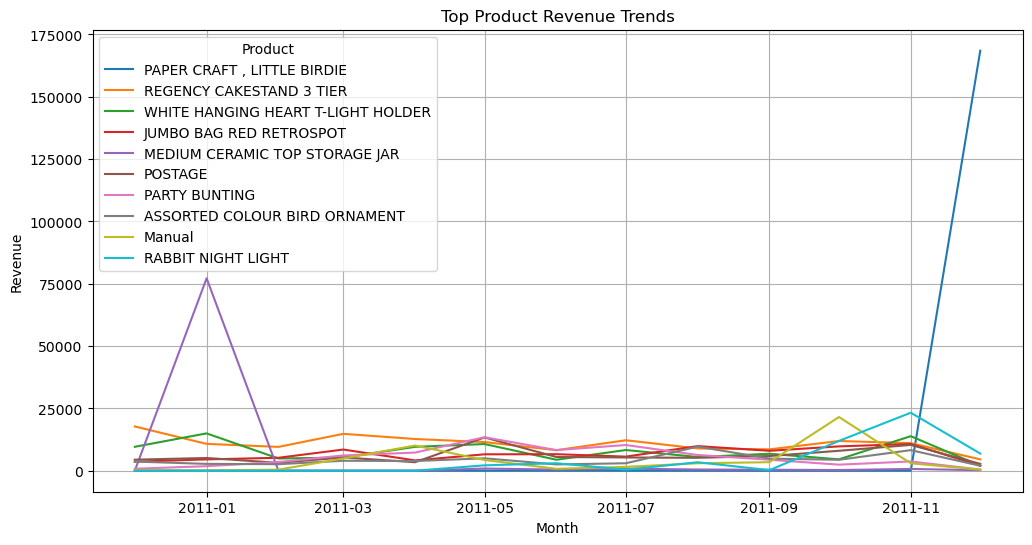

Analysis complete. Results saved to CSV files.


In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('purchase_data.csv')

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], dayfirst=True)

# Create TotalPrice column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Clean the data
data_cleaned = data.dropna(subset=['CustomerID'])
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]

# Aggregate customer behavior data
customer_analysis = data_cleaned.groupby('CustomerID').agg(
    TotalTransactions=('InvoiceNo', 'nunique'),
    TotalQuantity=('Quantity', 'sum'),
    TotalRevenue=('TotalPrice', 'sum'),
    FirstPurchase=('InvoiceDate', 'min'),
    LastPurchase=('InvoiceDate', 'max')
).reset_index()

# Calculate Recency (days since last purchase)
latest_date = data_cleaned['InvoiceDate'].max()
customer_analysis['Recency'] = (latest_date - customer_analysis['LastPurchase']).dt.days

# RFM Segmentation
customer_analysis['Frequency'] = customer_analysis['TotalTransactions']
customer_analysis['Monetary'] = customer_analysis['TotalRevenue']

# Normalize data for clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(customer_analysis[['Recency', 'Frequency', 'Monetary']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_analysis['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze clusters
cluster_summary = customer_analysis.groupby('Cluster').agg(
    AvgRecency=('Recency', 'mean'),
    AvgFrequency=('Frequency', 'mean'),
    AvgMonetary=('Monetary', 'mean'),
    CustomerCount=('CustomerID', 'count')
).reset_index()

print("Cluster Summary:")
print(cluster_summary)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_analysis,
    x='Recency', y='Monetary',
    hue='Cluster', palette='viridis'
)
plt.title('Customer Clusters by Recency and Monetary Value')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Analyze purchasing trends
data_cleaned['YearMonth'] = data_cleaned['InvoiceDate'].dt.to_period('M')
monthly_revenue = data_cleaned.groupby('YearMonth')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Identify changes in product preferences
product_trends = data_cleaned.groupby(['YearMonth', 'Description'])['TotalPrice'].sum().unstack().fillna(0)
top_products = product_trends.sum(axis=0).sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 6))
for product in top_products:
    plt.plot(product_trends.index.to_timestamp(), product_trends[product], label=product)

plt.title('Top Product Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Product')
plt.grid(True)
plt.show()

# Save analysis results
customer_analysis.to_csv('customer_clusters.csv', index=False)
monthly_revenue.to_csv('monthly_revenue.csv')
product_trends.to_csv('product_trends.csv')

print("Analysis complete. Results saved to CSV files.")
